<a href="https://colab.research.google.com/github/BranislavMajernik/qcomp/blob/main/CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def get_rule(idx):
    if idx < 256:
        input_patterns = [
            (1,1,1),
            (1,1,0),
            (1,0,1),
            (1,0,0),
            (0,1,1),
            (0,1,0),
            (0,0,1),
            (0,0,0)
        ]
        outputs = list(map(int,format(idx, "#010b")[2:]))
        mapping = dict(zip(input_patterns, outputs))
        mapping["name"] = "Rule %d" % (idx)
        return mapping
    else:
        raise ValueError("Rule number out of range")



In [ ]:
def iterate(board, rule):
    board = np.pad(board, (1, 1), 'constant', constant_values=(0,0))
    new_board = np.zeros_like(board)
    for i in range(1, board.shape[0] - 1):
        new_board[i] = rule[tuple(board[i-1:i+2])]
    return new_board[1:-1]



In [ ]:
def generate_map(initial_board, rule, num_iterations=100):

    if isinstance(initial_board, list):
        board = np.array(initial_board)
    else:
        board = initial_board

    board = np.pad(board, (num_iterations, num_iterations), 'constant', constant_values=(0,0))

    rows = [board]
    for i in range(num_iterations):
        board = iterate(board, rule)
        rows.append(board)

    rows = np.array(rows)
    return rows



In [ ]:
def visualize_board(board, title=None):
    plt.figure(figsize=(5,2.5))
    plt.imshow(board, cmap="Greys")
    plt.axis("off")
    if title is not None:
        plt.title(title, fontsize=14)
    plt.show()
    plt.close()



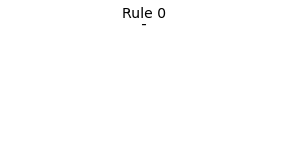

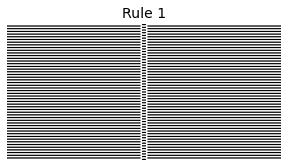

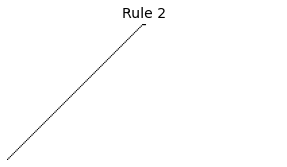

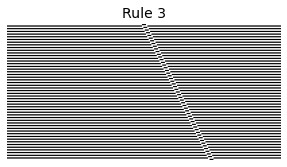

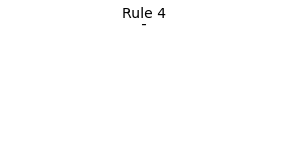

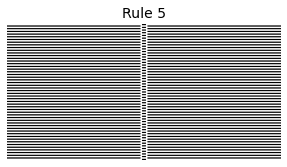

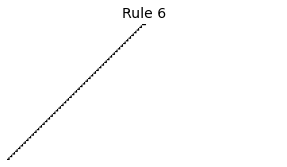

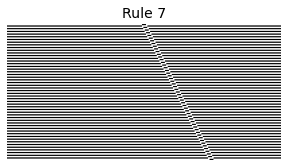

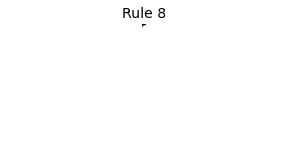

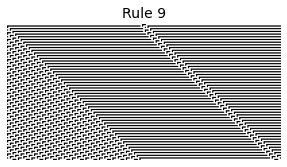

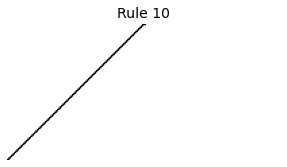

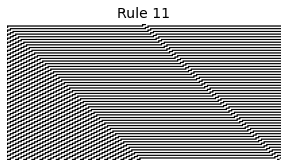

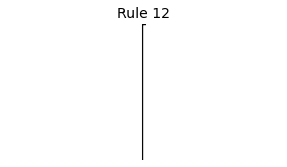

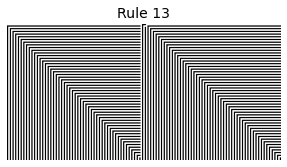

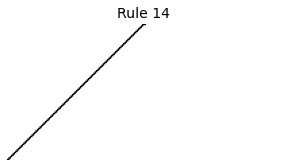

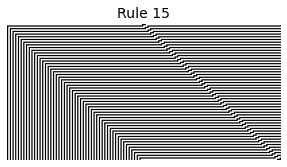

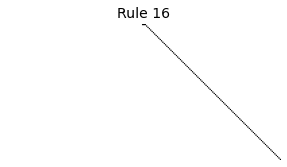

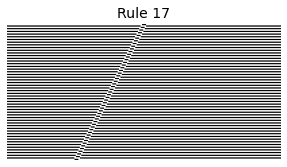

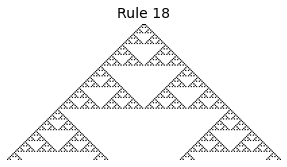

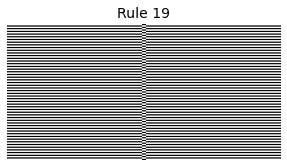

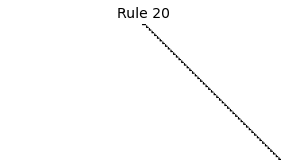

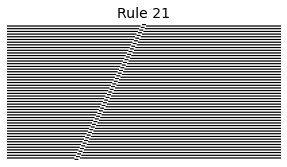

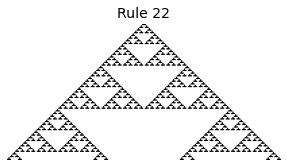

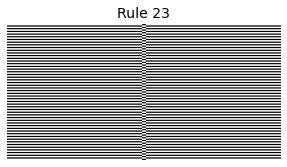

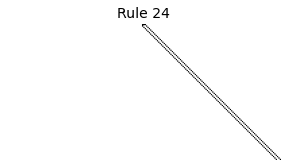

In [ ]:
for i in range(25):
    rule = get_rule(i)
    board = generate_map([1,1,1], rule, num_iterations=100)
    visualize_board(board, rule["name"])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
coordinates=[(0,0),(3,0),(3,-3),(0,-3)]

In [ ]:
def sierpiński_carpet(coordinates,lvl,colour='k'):

    #stop recursion
    if lvl==0:
        return

    #unpack coordinates
    #coordinates follow clockwise order
    topleft=coordinates[0];topright=coordinates[1]
    bottomright=coordinates[2];bottomleft=coordinates[3]

    #create new coordinates
    topleft_new=(topleft[0]+(topright[0]-topleft[0])/lvl,
                bottomleft[1]+(topleft[1]-bottomleft[1])/lvl*(lvl-1))

    topright_new=(topleft[0]+(topright[0]-topleft[0])/lvl*(lvl-1),
                bottomleft[1]+(topleft[1]-bottomleft[1])/lvl*(lvl-1))

    bottomleft_new=(topleft[0]+(topright[0]-topleft[0])/lvl,
                bottomleft[1]+(topleft[1]-bottomleft[1])/lvl)

    bottomright_new=(topleft[0]+(topright[0]-topleft[0])/lvl*(lvl-1),
                bottomleft[1]+(topleft[1]-bottomleft[1])/lvl)

    coordinates_new=[topleft_new,topright_new,bottomright_new,bottomleft_new]

    #viz new coordinates
    for i in range(len(coordinates_new)):
        plt.plot([coordinates_new[i][0],coordinates_new[i-1][0]],
                 [coordinates_new[i][1],coordinates_new[i-1][1]],c=colour)

    #recursive plot sub carpets following clockwise order
    sierpiński_carpet([topleft,(topleft_new[0],topleft[1]),
                       topleft_new,(topleft[0],topleft_new[1])],lvl-1)

    sierpiński_carpet([(topleft_new[0],topleft[1]),(topright_new[0],topright[1]),
                       topright_new,topleft_new],lvl-1)

    sierpiński_carpet([(topright_new[0],topright[1]),topright,
                       (topright[0],topright_new[1]),topright_new],lvl-1)

    sierpiński_carpet([topright_new,(topright[0],topright_new[1]),
                       (bottomright[0],bottomright_new[1]),bottomright_new],lvl-1)

    sierpiński_carpet([bottomright_new,(bottomright[0],bottomright_new[1]),
                       bottomright,(bottomright_new[0],bottomright[1]),],lvl-1)

    sierpiński_carpet([bottomleft_new,bottomright_new,
                       (bottomright_new[0],bottomright[1]),
                       (bottomleft_new[0],bottomleft[1])],lvl-1)

    sierpiński_carpet([(topleft[0],bottomleft_new[1]),bottomleft_new,
                       (bottomleft_new[0],bottomleft[1]),bottomleft],lvl-1)

    sierpiński_carpet([(topleft[0],topleft_new[1]),topleft_new,
                       bottomleft_new,(topleft[0],bottomleft_new[1])],lvl-1)

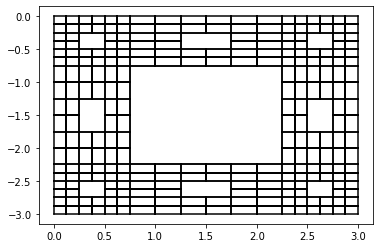

In [ ]:

sierpiński_carpet(coordinates,4)

In [ ]:
def sierpiński_triangle(coordinates,lvl,colour='k'):

    #stop recursion
    if lvl==0:
        return

    #unpack coordinates
    #coordinates have to follow the order of left,mid,right
    left=coordinates[0];mid=coordinates[1];right=coordinates[2]

    #compute mid point for each line
    left_new=((mid[0]-left[0])/lvl+left[0],(mid[1]-left[1])/lvl+left[1])
    mid_new=((right[0]-left[0])/lvl+left[0],(right[1]-left[1])/lvl+left[1])
    right_new=((right[0]-mid[0])/lvl+mid[0],(mid[1]-right[1])/lvl+right[1])

    #create new coordinates
    coordinates_new=[left_new,mid_new,right_new]

    #viz coordinates
    for i in coordinates:
        for j in coordinates:
            if i!=j:
                plt.plot([i[0],j[0]],[i[1],j[1]],c=colour)

    #recursive plot sub triangles
    sierpiński_triangle([left,left_new,mid_new],lvl-1)
    sierpiński_triangle([left_new,mid,right_new],lvl-1)
    sierpiński_triangle([mid_new,right_new,right],lvl-1)


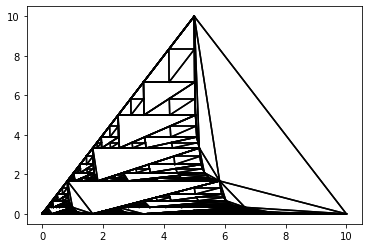

In [ ]:
sierpiński_triangle([(0,0),(5,10),(10,0)],6)